# Data Scientist Hiring Challenge

## Background
An E-commerce website has hundreds of thousands of visitors everyday. The visitors come from several marketing channels such as digital campaigns on social media, referrals from publishers, organic search and CRM.


The main business here is collecting traffic from different sources/channels and converting those visitors to leads. A marketing lead is **a person who shows interest in a brand's products or services**, which makes a visitor a potential customer for the seller/service provider. The primary goal of any company is to generate as many leads as possible to ultimately increase conversion rates in the sales funnel.


The main aim in the challenge is to develop a model that can forecast the next day number of leads.

 

## Datasets and Features
There is one main dataset and three others as auxiliary:

1. Transactions dataset is the main dataset that stores the number of leads for each minute broken down according to products and channels. The data goes back till 29.09.2020.
    
    Features:

    * pk: primary key and unique ID in the database table
    * ga_transactionid: the id of the transaction from google Analytics
    * ga_datehour: the time of the transaction in yyyymmddHH format
    * ga_products: name of the products (Product A, Product B, Product C, Product D, Product E, Product F)
    * ga_channels: the channel a visitor comes for (Facebook, Google Ads, Organic search, Direct, CRM)
    * ga_itemquantity: number of leads

2. Economic calendar dataset keeps record of all events that may affect economic variables such as currency exchange rate, interest rate, and stockes in the market.
    
    Features:

    * pk: primary key and unique ID in the database table  
    * date: starts from 28.04.2021
    * time: when the event takes place
    * country: where the event happened
    * indicator: the name of the event
    * priority: there are three levels (1, 2, 3) where 3 is the highest priority
    * exception: anticipated market impact  
    * previous: represents the previous market impact either positive or negative
 

3. Economic variables dataset observes and keeps track of the changes in terms of important variables such as USDTRY or BIST100. The dataset stores the variables daily at three different hours (09, 12, 15) hrs.
    
    Features:

    * pk: primary key and unique ID in the database table
    * date: starts from 28.04.2021
    * hour: (09, 12, 15) hrs
    * bist100: Borsa Istanbul stock exchange
    * usdtry: usd and try exchange rate
    * eurtry: eur and try exchange rate
    * eurusd: eur and usd exchange rate
    * faiz: interest rate in Turkey
    * xau: gold price in ounce
    * brent: Atlantic basin crude oils price
4. Live Digital campaigns dataset that has the number of live digital campaigns for everyday since 29.09.2020.
    
    Features:

    * date: since 29.09.2020
    * live_campaigns: numeric value of the number of campaign


## Tasks
1. Give some analysis on the relationship between the economical events and variables and their impacts on the daily number of visitors.
2. Using Transaction dataset, forecast the next day leads for each channel (Facebook, CRM and so on).
3. Given the number of live digital campaigns and other auxiliary datasets, try to optimise the performance of your forecasting model (or even develop a new model).

## Deliverables


Write your solution on jupyter notebooks for each task (analysis and model development) and make it clear you explain what you are doing properly.


Your jupyter notebooks for each task should be named in the following format: Task1.ipynb, Task2.ipynb and Task3.ipynb


Make sure that your code is replicable and you document your approach and code in a clear way.

## Task 2

Using Transaction dataset, forecast the next day leads for each channel (Facebook, CRM and so on).

In [1]:
#Let's import some important libraries
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Let's read transaction dataset and check the head
df_transactions = pd.read_csv("transactions.csv"); df_transactions.head()

,pk,ga_transactionid,ga_datehour,ga_products,ga_channels,ga_itemquantity
0,146288072,2_50414543,2020082900,Product D,Facebook,1
1,146288071,2_50414542,2020082900,Product D,Organic search,1
2,146287503,2_50413935,2020082900,Product D,Organic search,1
3,146287504,2_50413936,2020082900,Product D,Organic search,1
4,146296436,3_65496155,2020082900,Product E,Google Ads,1


In [3]:
#We only need datehour to obtain daily leads, channels and item quantity to obtain total leads day by day so we filter
#this 3 attributes and store it in df variable.
df = df_transactions[["ga_datehour","ga_channels","ga_itemquantity"]]

In [4]:
#Let's convert string date hour data to datetime so that we can obain daily data with ease.
df["ga_datehour"] = pd.to_datetime(df.ga_datehour,format="%Y%m%d%H")

In [5]:
#Let's store channels to the columns and resample it daily to obtain daily leads for each and every channel & store it in df_daily
df_daily = pd.crosstab(df.ga_datehour.fillna("NA"),df.ga_channels.fillna("NA"),values=df.ga_itemquantity,aggfunc="sum",dropna=False).resample("D").sum()

In [6]:
df_daily

ga_channels,CRM,Direct,Facebook,Google Ads,NA,Organic search,Referral
ga_datehour,,,,,,,
2020-08-29,2420.0,337.0,2123.0,21985.0,1227.0,4938.0,389.0
2020-08-30,2611.0,376.0,2812.0,24524.0,1292.0,5878.0,505.0
2020-08-31,3282.0,500.0,2921.0,33484.0,1343.0,7915.0,580.0
2020-09-01,20859.0,501.0,2547.0,32932.0,1420.0,7588.0,614.0
2020-09-02,11520.0,550.0,3065.0,30143.0,1314.0,6998.0,616.0
...,...,...,...,...,...,...,...
2021-10-14,2848.0,747.0,4930.0,34627.0,3254.0,4393.0,105.0
2021-10-15,3953.0,722.0,4327.0,32897.0,3120.0,4175.0,66.0
2021-10-16,1318.0,493.0,4291.0,21555.0,5130.0,2598.0,62.0


In [7]:
df_daily.index.names = ["Date"]
df_daily.columns.names = ["Channels"]

In [8]:
#Let's add total number of leads daily.
df_daily["Total"]=df_daily.apply(np.sum, axis=1)

In [9]:
df_daily.isnull().sum()

Channels
CRM               0
Direct            0
Facebook          0
Google Ads        0
NA                0
Organic search    0
Referral          0
Total             0
dtype: int64

In [10]:
df_daily

Channels,CRM,Direct,Facebook,Google Ads,NA,Organic search,Referral,Total
Date,,,,,,,,
2020-08-29,2420.0,337.0,2123.0,21985.0,1227.0,4938.0,389.0,33419.0
2020-08-30,2611.0,376.0,2812.0,24524.0,1292.0,5878.0,505.0,37998.0
2020-08-31,3282.0,500.0,2921.0,33484.0,1343.0,7915.0,580.0,50025.0
2020-09-01,20859.0,501.0,2547.0,32932.0,1420.0,7588.0,614.0,66461.0
2020-09-02,11520.0,550.0,3065.0,30143.0,1314.0,6998.0,616.0,54206.0
...,...,...,...,...,...,...,...,...
2021-10-14,2848.0,747.0,4930.0,34627.0,3254.0,4393.0,105.0,50904.0
2021-10-15,3953.0,722.0,4327.0,32897.0,3120.0,4175.0,66.0,49260.0
2021-10-16,1318.0,493.0,4291.0,21555.0,5130.0,2598.0,62.0,35447.0


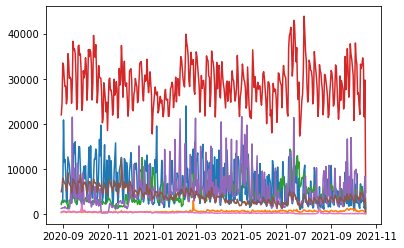

In [11]:
#Let's plot leads for each channel
for col in df_daily.columns[:-1]:
    plt.plot(df_daily.index,df_daily[col])

In [12]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error,r2_score 
from statsmodels.tsa.seasonal import seasonal_decompose

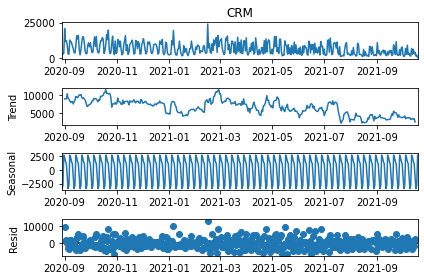

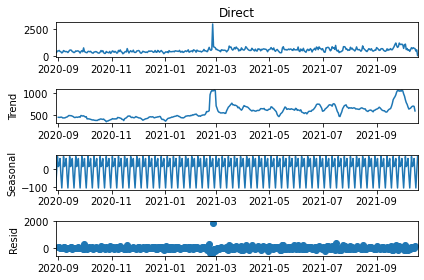

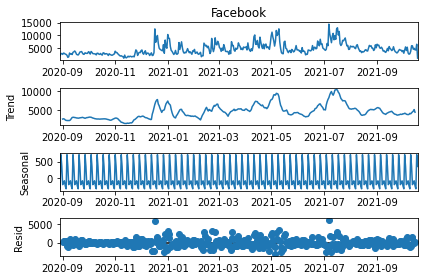

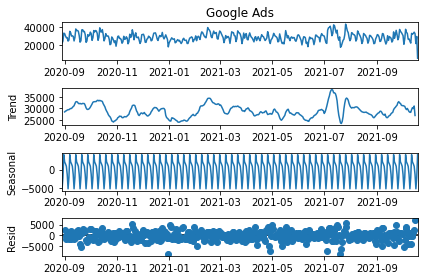

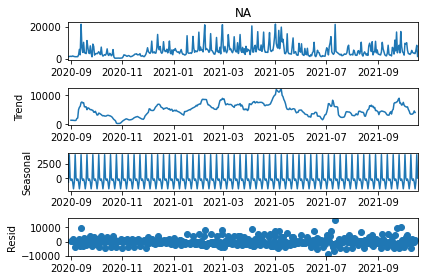

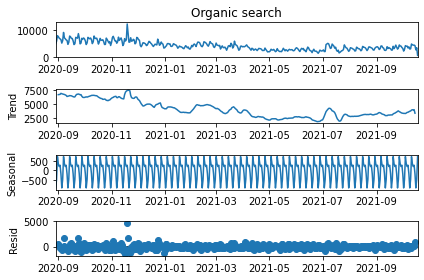

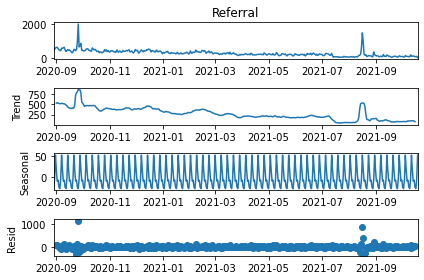

In [13]:
#Let's plot weather our datas trend and seasonal features
for col in df_daily.columns[:-1]:
    decompose_result = seasonal_decompose(df_daily[col])
    decompose_result.plot()

In [14]:
#We prepared our data now let's do train test split. But since we are dealing with time series, we cannot split our data 
#randomly. We should split it in a linear way.
#Let's take %80 of it for train and %20 for test.
print("Train size of our data is: ", df_daily.index.size*0.8)
print("Test size of our data is: ", df_daily.index.size*0.2)

Train size of our data is:  332.8
Test size of our data is:  83.2


In [15]:
#Our train dataset starts from the beginning and end 333. date so let's split it that way.
df_daily_train = df_daily.iloc[:333]
#And our test dataset starts from 333. data point and end at the end.
df_daily_test = df_daily.iloc[333:]

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
#Let's apply Exponential smoothing to our data to predict next day's lead and do parameter tuning to our data:
trend = [None, "add", "mul"]
damped = [False, True]
seasonal = [None, "add", "mul"]

results = pd.DataFrame([], columns=["Best Parameter (trend,damped,seasonal)","Best MSE","Next Days Visit"])

for col in df_daily_test.columns[:-1]:
    best_mse = np.inf
    for t in trend:
        for d in damped:
            for s in seasonal:
                if t == None:
                    d = False
                exp_smh = ExponentialSmoothing(df_daily_train[col],trend=t,damped=d, seasonal=s).fit()
                y_pred = exp_smh.predict(df_daily_test.index[0],df_daily_test.index[-1])
                mse = mean_squared_error(df_daily_test[col], y_pred)
                if mse < best_mse:
                    best_mse = mse
                    best_param = (t,d,s)
                    next_day_visit = exp_smh.predict("2021-10-19") 
    results.loc[col] = [best_param, best_mse,next_day_visit.values.astype("float")]
results

,"Best Parameter (trend,damped,seasonal)",Best MSE,Next Days Visit
CRM,"(add, False, mul)",7.117286e+06,[4713.267974759009]
Direct,"(add, False, add)",3.534262e+04,[749.7844433247408]
Facebook,"(add, False, add)",3.290151e+06,[2821.100870581327]
Google Ads,"(None, False, mul)",9.888446e+07,[39941.64145889034]
NA,"(mul, True, mul)",1.010173e+07,[4212.271914552503]
Organic search,"(add, True, add)",4.211442e+05,[3789.8310161567792]
Referral,"(mul, False, add)",3.814062e+04,[111.1764814474935]
